<img src='https://drive.google.com/uc?export=view&id=1-PExlpxdip_2t7wN9Ru8Sn_jTTxj3MlA' width=100px>

<h1>Applied Text Mining and Sentiment Analysis with Python</h1>

Welcome! 

If you're ready. Let's go!




<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 1` Dataset Overview


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.2** Load and analyze Dataset

Very useful packages for Data Analysis. Don't hesitate to visit any of those sites in case you don't get what we are doing.
*   `Pandas`: https://pandas.pydata.org/docs/
*   `Numpy`: https://numpy.org/doc/





In [259]:
import pandas as pd
import numpy as np

* Read Dataframe stored in data folder under `.csv` format

In [260]:
dataframe1 = pd.read_csv("C:/Users/aiman/OneDrive - Universiti Teknologi MARA/Documents/Subjects/Semester 6/CSP650/Systrem Development/data/depress_text.csv", index_col=0)
dataframe2 = pd.read_csv("C:/Users/aiman/OneDrive - Universiti Teknologi MARA/Documents/Subjects/Semester 6/CSP650/Systrem Development/data/non_depress_text.csv", index_col=0)

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the light theme
sns.set_style("whitegrid")

# Display dataframe1
print("Dataframe1:")
dataframe1

Dataframe1:


,Sentiment
Text,
I'm losing my will to live.,1
The fear of asking for extensions or accommodations due to the stigma attached to mental health issues. #StigmaInAcademia,1
"The fear of failure and disappointing others, leading to paralyzing academic anxiety. #FearOfFailure",1
I can't escape the grip of this deep sadness.,1
"""Depression has affected my self-esteem and made me believe I'm not worthy of love or happiness."" #SelfEsteemStruggles",1
...,...
"""I struggle with recurring thoughts of death or dying, as if it's the only way to escape this pain.""",1
Having difficulty in managing everyday tasks and responsibilities. #FunctionalImpairment,1
Feeling a sense of disconnection from personal aspirations or a lack of motivation to pursue them. #LackOfAspiration,1


In [262]:
dataframe2

,Sentiment
Text,
"""I had a fantastic day at a food festival, savoring a variety of cuisines, sampling gourmet dishes, and experiencing culinary delights.""",0
"""Your dreams are worth pursuing. Stay committed, work hard, and never give up.""",0
"""The universe has a way of aligning things in divine timing. Trust the process and have faith in the journey.""",0
@hi_sweetye I hope so,0
"""Each day is an opportunity to create a life that aligns with my values, passions, and desires. I have the power to shape my own destiny.""",0
...,...
"""You are capable of more than you can imagine. Believe in yourself and trust your abilities.""",0
"""The power of gratitude is transformative. When I focus on the blessings in my life, I invite more reasons to be grateful and experience abundance.""",0
"""I had a memorable day at an outdoor adventure park, conquering obstacle courses, zip-lining, and challenging myself physically.""",0


In [263]:
len(dataframe2)

920

* Use the `sample` method to look at some random tweets present in our dataset

In [264]:
import pandas as pd

# Gabungkan kedua DataFrame
df = pd.concat([dataframe1, dataframe2])

# Reset the index of the DataFrame
df = df.reset_index()

df.sample(20)
df.to_csv("Sentiment_data.csv", index=False)

* Check how many tweets there are in total

In [265]:
print("Number of tweets: {}".format(len(df)))

Number of tweets: 1941


* Print a tweet and its sentiment based on a tweet ID

In [266]:
tweet_id = 445
tweet = df.iloc[tweet_id]

In [267]:
print("Tweet: {}".format(tweet["Text"]))
print("Tweet sentiment: {}".format(tweet["Sentiment"]))

Tweet: The world feels like a hostile and unwelcoming place.
Tweet sentiment: 1


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.3** Dataset Visualization

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.3.1** Matplotlib</h4>

* Import the `pyplot` module from the matplotlib package 

In [268]:
import matplotlib.pyplot as plt

In [269]:
print("Number of Depression tweets: {}".format(df[df["Sentiment"]==1].count()[0]))
print("Number of Non Depression tweets: {}".format(df[df["Sentiment"]==0].count()[0]))


Number of Depression tweets: 1021
Number of Non Depression tweets: 920


C:\Users\aiman\AppData\Local\Temp\ipykernel_9908\1157045285.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of Depression tweets: {}".format(df[df["Sentiment"]==1].count()[0]))
C:\Users\aiman\AppData\Local\Temp\ipykernel_9908\1157045285.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of Non Depression tweets: {}".format(df[df["Sentiment"]==0].count()[0]))


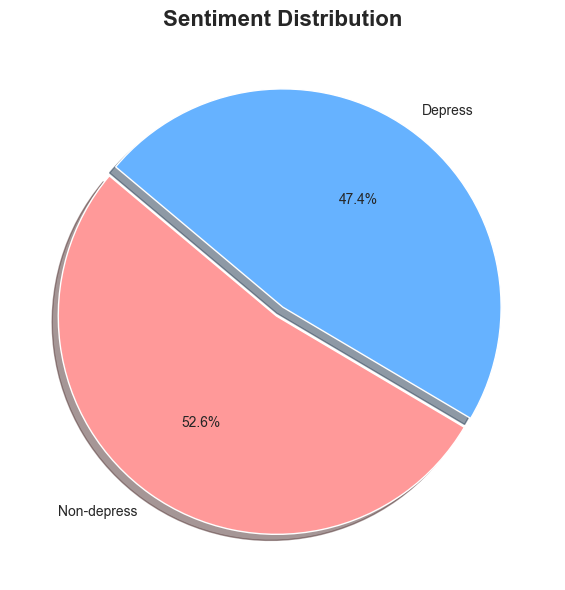

In [270]:
# Calculate sentiment counts
sentiment_count = df["Sentiment"].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size

# Define colors for the pie chart
colors = ['#FF9999', '#66B2FF']

# Create the pie chart with custom colors and explode a slice
plt.pie(sentiment_count, labels=["Non-depress", "Depress"],
        colors=colors, autopct='%1.1f%%', startangle=140,
        shadow=True, explode=(0.05, 0))

# Set the title and adjust the layout
plt.title("Sentiment Distribution", fontsize=16, fontweight="bold")
plt.tight_layout()

# Display the chart
plt.show()

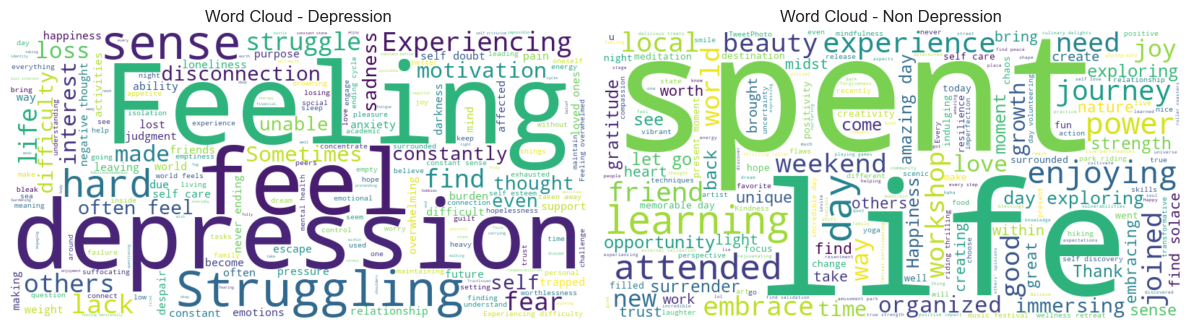

In [271]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate the post text based on label
label_1_text = ' '.join(df[df['Sentiment'] == 1]['Text'])
label_0_text = ' '.join(df[df['Sentiment'] == 0]['Text'])

# Create WordCloud objects for each label
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(label_1_text)
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(label_0_text)

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(wordcloud_1, interpolation='bilinear')
axes[0].set_title('Word Cloud - Depression')
axes[0].axis('off')

axes[1].imshow(wordcloud_0, interpolation='bilinear')
axes[1].set_title('Word Cloud - Non Depression')
axes[1].axis('off')

# Display the word clouds
plt.tight_layout()
plt.show()


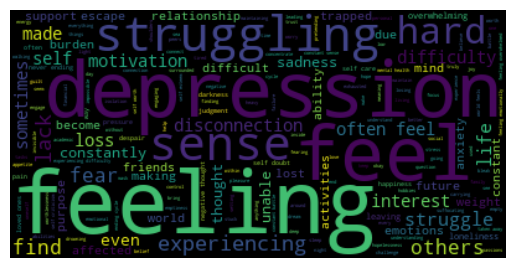

In [272]:
pos_tweets = df[df["Sentiment"] == 1.0]
txt = " ".join(str(tweet).lower() for tweet in pos_tweets["Text"] if not pd.isnull(tweet))
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

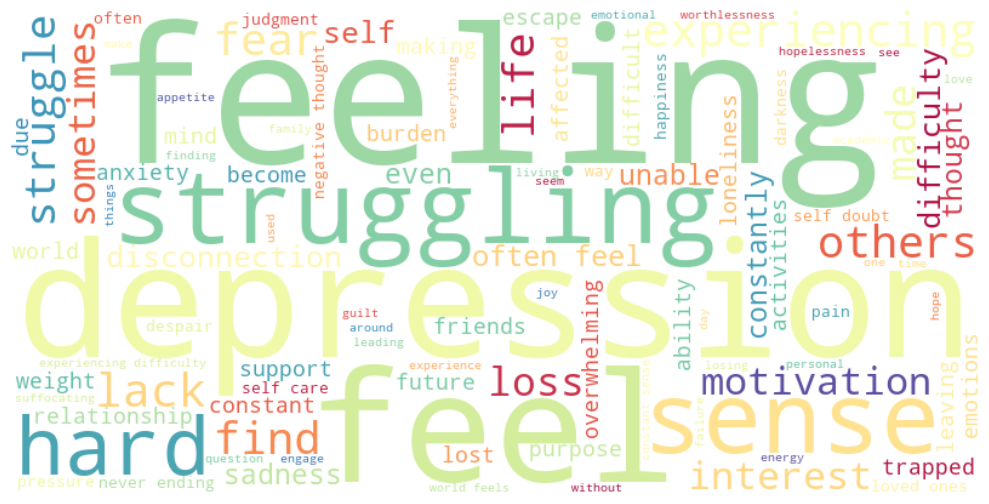

In [273]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

pos_tweets = df[df["Sentiment"] == 1.0]
txt = " ".join(str(tweet).lower() for tweet in pos_tweets["Text"] if not pd.isnull(tweet))

# Increase figure size
plt.figure(figsize=(10, 8))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Spectral', max_words=100, relative_scaling=0.5).generate(txt)

# Display the word cloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()


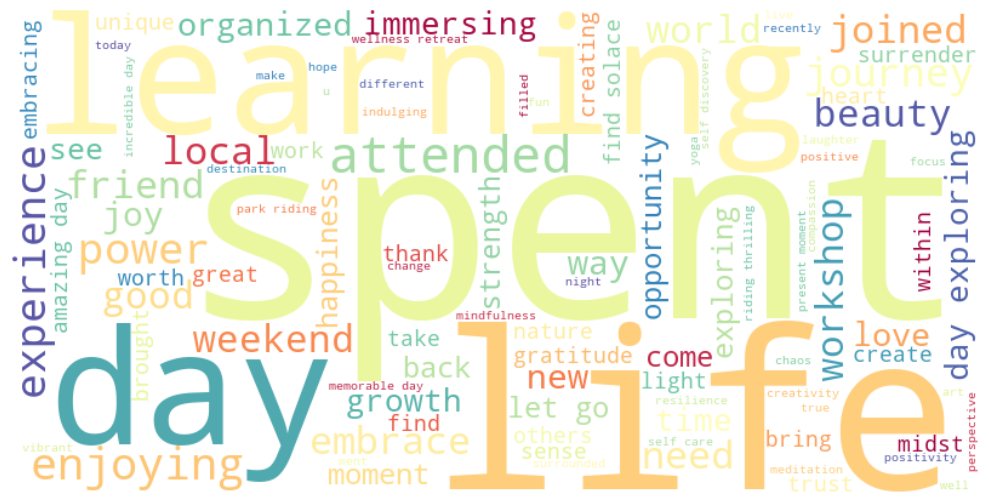

In [274]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

pos_tweets = df[df["Sentiment"] == 0.0]
txt = " ".join(str(tweet).lower() for tweet in pos_tweets["Text"] if not pd.isnull(tweet))

# Increase figure size
plt.figure(figsize=(10, 8))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Spectral', max_words=100, relative_scaling=0.5).generate(txt)

# Display the word cloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()


# `SECTION 2` Text Normalization

As this section relies quite a lot on `REGEX`, you might want to have a look at the following website: https://regexr.com/

* Import `regex` package

In [275]:
import re

## **2.1** Twitter features

* Example of a *random* tweet that can be found on Twitter

In [276]:
tweet = "RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun"

### **2.1.1** RT Tag

* `R` : match "R" character
* `T` : match "T" character
* `\s` : match any whitespace character
* `+` : match one or more of the preceding tokens

#### Handle the RT Tag

* Replace occurences of `RT` with a default value

In [277]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [278]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


### **2.1.2** @User Tag

* `\B` : match any position that is not a word boundary
* `@` : match "@" character
* `\w` : match any word character 
* `+` : match one or more of the preceding tokens

#### Handle the User Tag

* Replace `@_Someone_` with a default user tag

In [279]:
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [280]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser I love this! 👍 https://AIOutsider.com #NLP #Fun


###  **2.1.3** Emojis

* Install the `emoji` package

* Import the installed package

In [281]:
import emoji

* Replace emojis with a meaningful text

In [282]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [283]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @AIOutsider I love this! :thumbs_up: https://AIOutsider.com #NLP #Fun


###  **2.1.4** URL

* `(http|https)` : capturing group matching either http or https
* `:` : match the ":" character
* `\/` : match the "/" charachter
* `\S` : match any character that is not whitespace
* `+` : match one or more of the preceding tokens

#### Handle the URL

* Replace occurences of `http://` or `https://` with a default value

In [284]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [285]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍  #NLP #Fun


###  **2.1.5** Hashtags

* Replace occurences of `#_something_` with a default value

In [286]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [287]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍 https://AIOutsider.com NLP Fun


## **2.2** Word Features

Let's now have a look at some other features that are not really Twitter-dependant

In [288]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

###  **2.2.1** Remove upper capitalization

* Lower case each letter in a specific tweet

In [289]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [290]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: looooooook at this ... i'd like it so much!


###  **2.2.2** Word repetition

* Replace word repetition with a single occurence ("oooooo" becomes "oo")

In [291]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [292]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: LOOK at this .. I'd like it so much!


###  **2.2.3** Punctuation repetition

* Replace punctuation repetition with a single occurence ("!!!!!" becomes "!")

In [293]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [294]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: LOOOOOOOOK at this . I'd like it so much!


### **2.2.4** Word contraction

* Install the `contractions` package

* Import the installed package

In [295]:
import contractions

* Use `contractions_dict` to list most common contractions

In [296]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions dictionnary

In [297]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [298]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions package

In [299]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [300]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


## **2.3** Tokenization

More information about NLTK? Head over to: https://www.nltk.org

* Install the `NLTK` package

###  **2.3.1** Easy Tokenization

* Import `NLTK`
* Import the `word_tokenize` module from NLTK 
* Download the `Punkt` tokenizer model from NLTK

In [301]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aiman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* Simple tweet to be tokenized

In [302]:
tweet = "These are 5 different words!"

* Create a `tokenize()` function that takes a tweet as input and returns a list of tokens

In [303]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

* Use the `tokenize()` function to print the tokenized version of a tweet

In [304]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']


That's it for the easy method! You will now see there is more you can do about it.

###  **2.3.2** Custom Tokenization

* Import the `string` package 

In [305]:
import string

* Retrieve english punctuation signs by using the `string` package

In [306]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* Import the `stopwords` module from NLTK
* Download `stopwords` data from NLTK

In [307]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aiman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* Create a set of english stopwords

In [308]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'hasn', 'what', 'into', 'again', 'no', 'very', 'had', 'between', 'those', 'whom', 'once', 'it', 'isn', 'did', "you'd", 'will', 'me', "weren't", 'where', 'y', 'some', 'same', "should've", "you've", 'hers', 'are', 'him', 'herself', "shouldn't", 'do', 'their', 'll', 'were', 'too', 'won', "isn't", 'here', 'we', "wouldn't", 'before', 'all', 're', "couldn't", 'his', 'has', 'the', 'as', 'more', 'from', 'further', 'not', 'below', 'should', 'them', 't', 'and', "you'll", 'they', 'your', 'yourself', 'that', 'after', 'yourselves', 'out', 'there', 'our', "won't", 'needn', 's', 'mightn', 'aren', 'didn', 'most', 'was', 'been', 'against', 'own', 'this', 'other', 'but', 'does', 'than', 'if', 'can', 'yours', "doesn't", 'wouldn', 'ours', 'how', 'because', 'am', 'couldn', 'himself', 'i', 'doesn', 'by', 'about', 'm', "wasn't", 'd', 'its', 'being', 'few', 'any', "didn't", 'myself', 'theirs', 'which', 'ain', "shan't", 'off', 'my', 'such', 'shouldn', 'she', "don't", 'be', 'above', 'on', 'or', 'under', 'to', 

* Remove some stopwords from the set

In [309]:
stop_words.discard('not')
print(stop_words)

{'hasn', 'what', 'into', 'again', 'no', 'very', 'had', 'between', 'those', 'whom', 'once', 'it', 'isn', 'did', "you'd", 'will', 'me', "weren't", 'where', 'y', 'some', 'same', "should've", "you've", 'hers', 'are', 'him', 'herself', "shouldn't", 'do', 'their', 'll', 'were', 'too', 'won', "isn't", 'here', 'we', "wouldn't", 'before', 'all', 're', "couldn't", 'his', 'has', 'the', 'as', 'more', 'from', 'further', 'below', 'should', 'them', 't', 'and', "you'll", 'they', 'your', 'yourself', 'that', 'after', 'yourselves', 'out', 'there', 'our', "won't", 'needn', 's', 'mightn', 'aren', 'didn', 'most', 'was', 'been', 'against', 'own', 'this', 'other', 'but', 'does', 'than', 'if', 'can', 'yours', "doesn't", 'wouldn', 'ours', 'how', 'because', 'am', 'couldn', 'himself', 'i', 'doesn', 'by', 'about', 'm', "wasn't", 'd', 'its', 'being', 'few', 'any', "didn't", 'myself', 'theirs', 'which', 'ain', "shan't", 'off', 'my', 'such', 'shouldn', 'she', "don't", 'be', 'above', 'on', 'or', 'under', 'to', 'oursel

* Create a `custom_tokenize` function

In [310]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    # stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

* Test the function with a particular tweet

In [311]:
tweet = "these are 5 different words!"

In [312]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'different', 'words']
Tweet tokens: ['5', 'different', 'words']


## **2.4** Stemming

More information about `NLTK.stem`? Head over to: https://www.nltk.org/api/nltk.stem.html

* Import different libraries and modules used for stemming

In [313]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

* List of tokens to stem (remember that we stem tokens and not entire sentences)

In [314]:
tokens = ["manager", "management", "managing"]

* Stemmers can be defined by directly using NLTK

In [315]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

* Create a `stem_tokens` function that takes the list of tokens as input and returns a list of stemmed tokens

In [316]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

* Print the different results and compare the stemmed tokens

In [317]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


* Check over-stemming and under-stemming

In [318]:
tokens = ["international", "companies", "had", "interns"]

In [319]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


## **2.5** Lemmatization

More information about WordNet? Head over to https://wordnet.princeton.edu/

* Import different libraries and modules used for lemmatization

In [320]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aiman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* List of tokens to lemmatize (remember that we lemmatize tokens and not entire sentences)

In [321]:
tokens = ["international", "companies", "had", "interns"]

* Part of Speech (POS) tagging

In [322]:
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

* Create the lemmatizer by using the `WordNet` module

In [323]:
lemmatizer = WordNetLemmatizer()

* Create a `lemmatize_tokens` function that takes the list of tokens as input and returns a list of lemmatized tokens

In [324]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [325]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


## **2.6** Putting it all together

* Long and complex tweet to be processed

In [326]:
complex_tweet = r"""RT @AIOutsider : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

* Create a custom `process_tweet` function that can be used to process tweets end-to-end
* **Note**: this function will be used as a base for the following sections, so be careful!

In [327]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  processed_tweet = " ".join(stem)  # Join stemmed tokens back into a single string

  return processed_tweet

  return stem

* Test your `process_tweet` function!

In [328]:
print(process_tweet(complex_tweet, verbose=False))

look big complex tweet would glad could normal check let know nlp fun


* Look at some more examples! 
* **Note:** it's totally possible you encounter some strange tweet processing (happens if the original tweet is initially strangely written) 

In [329]:
import random
df["Text"]

0                             I'm losing my will to live.
1       The fear of asking for extensions or accommoda...
2       The fear of failure and disappointing others, ...
3           I can't escape the grip of this deep sadness.
4       "Depression has affected my self-esteem and ma...
                              ...                        
1936    "You are capable of more than you can imagine....
1937    "The power of gratitude is transformative. Whe...
1938    "I had a memorable day at an outdoor adventure...
1939                                  Good morning world.
1940                        @Aggieduchess10 Goooood Luck!
Name: Text, Length: 1941, dtype: object

In [330]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["Text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: "The world feels overwhelming, and even the simplest tasks feel insurmountable."
Post Twitter processing tweet: "The world feels overwhelming, and even the simplest tasks feel insurmountable."
Post Word processing tweet: "the world feels overwhelming, and even the simplest tasks feel insurmountable."
world feel overwhelm even simplest task feel insurmount


Initial tweet: The pressure to maintain a perfect GPA adds to my anxiety. Each grade feels like a reflection of my self-worth. #GradeObsession
Post Twitter processing tweet: The pressure to maintain a perfect GPA adds to my anxiety. Each grade feels like a reflection of my self-worth. GradeObsession
Post Word processing tweet: the pressure to maintain a perfect gpa adds to my anxiety. each grade feels like a reflection of my self-worth. gradeobsession
pressur maintain perfect gpa add anxieti grade feel like reflect gradeobsess


Initial tweet: "I joined a local photography club, attending meetups, sharing ideas, and h

In [331]:
df['Text']

0                             I'm losing my will to live.
1       The fear of asking for extensions or accommoda...
2       The fear of failure and disappointing others, ...
3           I can't escape the grip of this deep sadness.
4       "Depression has affected my self-esteem and ma...
                              ...                        
1936    "You are capable of more than you can imagine....
1937    "The power of gratitude is transformative. Whe...
1938    "I had a memorable day at an outdoor adventure...
1939                                  Good morning world.
1940                        @Aggieduchess10 Goooood Luck!
Name: Text, Length: 1941, dtype: object

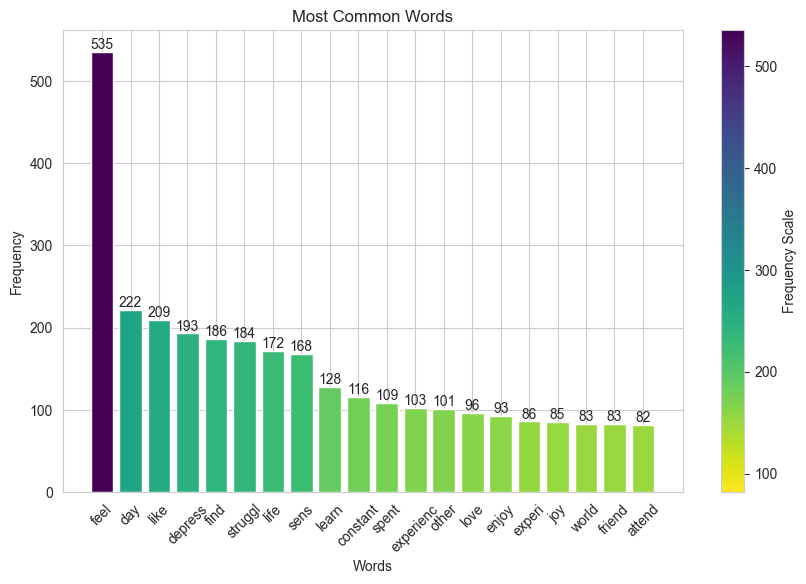

In [333]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import matplotlib.cm as cm

# Apply the process_tweet function to clean and process the tweets
cleaned_tweets = df["Text"].apply(process_tweet)

# Combine all the cleaned tweets into a single string
all_tweets = ' '.join(cleaned_tweets)

# Tokenize the combined string into individual words
tokens = all_tweets.split()

# Count the frequency of each word
word_counts = Counter(tokens)

# Get the most common words and their corresponding frequencies
most_common = word_counts.most_common(20)  # Change the number to get more or fewer common words

# Extract the words and frequencies into separate lists
words = [word for word, count in most_common]
frequencies = [count for word, count in most_common]

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Convert frequencies to NumPy array and normalize to range [0, 1]
frequencies = np.array(frequencies)
normalized_frequencies = frequencies / np.max(frequencies)

# Create a color gradient for the bars
colors = cm.viridis_r(normalized_frequencies)

# Create a bar chart to visualize the most common words
bars = ax.bar(words, frequencies, color=colors)
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Most Common Words')
plt.xticks(rotation=45)

# Add count labels to the bars
for bar, freq in zip(bars, frequencies):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(freq), ha='center', va='bottom')

# Create a colorbar legend
sm = cm.ScalarMappable(cmap=cm.viridis_r)
sm.set_array(frequencies)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Frequency Scale')

plt.show()

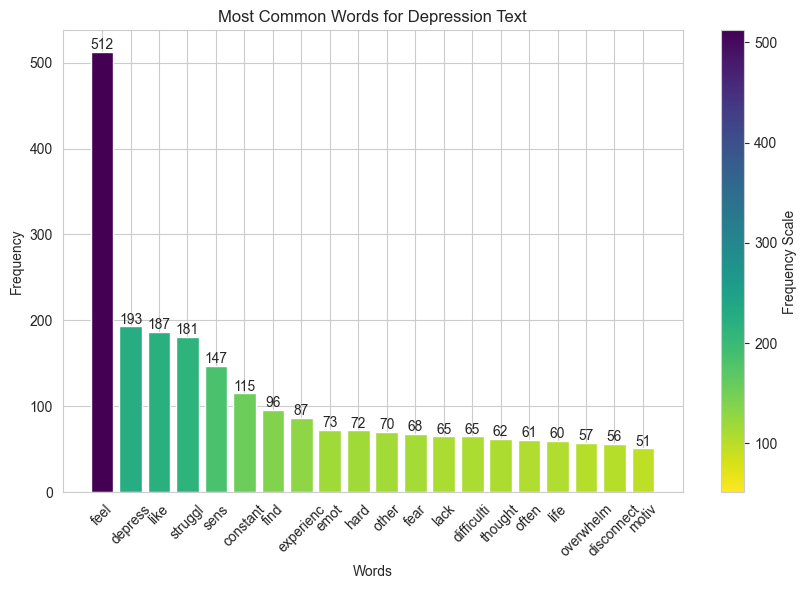

In [334]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import matplotlib.cm as cm

# Filter the dataset for sentiment label 1 (depressive text)
depressive_tweets = df[df["Sentiment"] == 1]["Text"]

# Apply the process_tweet function to clean and process the depressive tweets
cleaned_tweets = depressive_tweets.apply(process_tweet)

# Combine all the cleaned tweets into a single string
all_tweets = ' '.join(cleaned_tweets)

# Tokenize the combined string into individual words
tokens = all_tweets.split()

# Count the frequency of each word
word_counts = Counter(tokens)

# Get the most common words and their corresponding frequencies
most_common = word_counts.most_common(20)  # Change the number to get more or fewer common words

# Extract the words and frequencies into separate lists
words = [word for word, count in most_common]
frequencies = [count for word, count in most_common]

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Convert frequencies to NumPy array and normalize to range [0, 1]
frequencies = np.array(frequencies)
normalized_frequencies = frequencies / np.max(frequencies)

# Create a color gradient for the bars
colors = cm.viridis_r(normalized_frequencies)

# Create a bar chart to visualize the most common words for depressive text
bars = ax.bar(words, frequencies, color=colors)
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Most Common Words for Depression Text')
plt.xticks(rotation=45)

# Add count labels to the bars
for bar, freq in zip(bars, frequencies):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(freq), ha='center', va='bottom')

# Create a colorbar legend
sm = cm.ScalarMappable(cmap=cm.viridis_r)
sm.set_array(frequencies)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Frequency Scale')

plt.show()


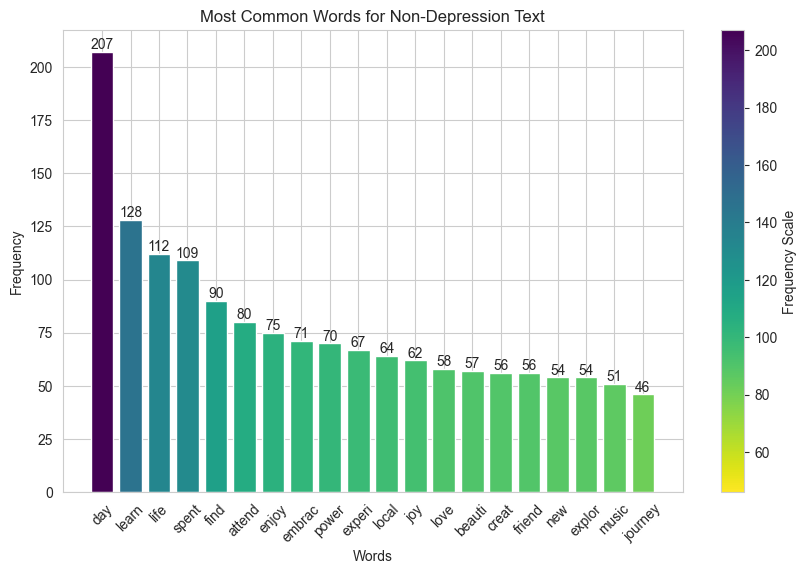

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import matplotlib.cm as cm

# Filter the dataset for sentiment label 0 (non-depressive text)
depressive_tweets = df[df["Sentiment"] == 0]["Text"]

# Apply the process_tweet function to clean and process the non-depressive tweets
cleaned_tweets = depressive_tweets.apply(process_tweet)

# Combine all the cleaned tweets into a single string
all_tweets = ' '.join(cleaned_tweets)

# Tokenize the combined string into individual words
tokens = all_tweets.split()

# Count the frequency of each word
word_counts = Counter(tokens)

# Get the most common words and their corresponding frequencies
most_common = word_counts.most_common(20)  # Change the number to get more or fewer common words

# Extract the words and frequencies into separate lists
words = [word for word, count in most_common]
frequencies = [count for word, count in most_common]

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Convert frequencies to NumPy array and normalize to range [0, 1]
frequencies = np.array(frequencies)
normalized_frequencies = frequencies / np.max(frequencies)

# Create a color gradient for the bars
colors = cm.viridis_r(normalized_frequencies)

# Create a bar chart to visualize the most common words for depressive text
bars = ax.bar(words, frequencies, color=colors)
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Most Common Words for Non-Depression Text')
plt.xticks(rotation=45)

# Add count labels to the bars
for bar, freq in zip(bars, frequencies):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(freq), ha='center', va='bottom')

# Create a colorbar legend
sm = cm.ScalarMappable(cmap=cm.viridis_r)
sm.set_array(frequencies)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Frequency Scale')

plt.show()


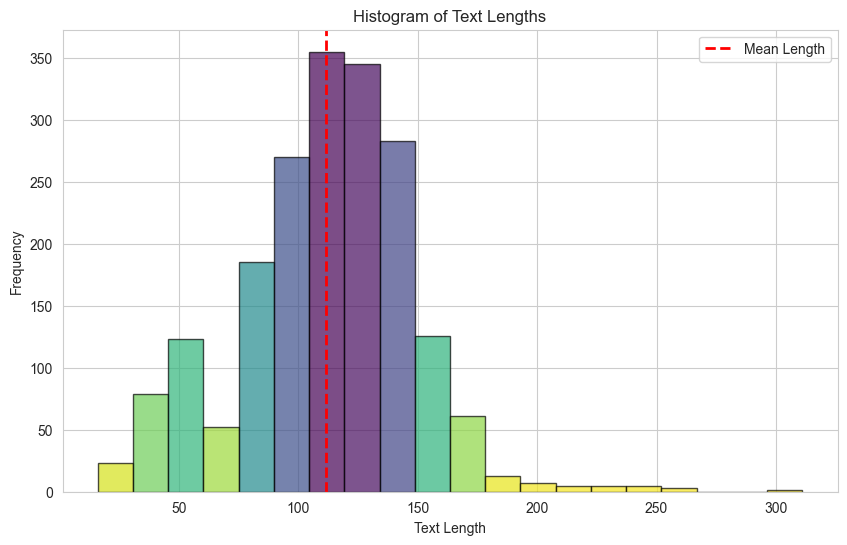

In [336]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the length of each text
text_lengths = df['Text'].apply(len)

# Set the figure size and create a subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram with customized settings
n, bins, patches = ax.hist(text_lengths, bins=20, edgecolor='black', alpha=0.7)

# Set colors for each patch based on frequency
max_freq = max(n)
colors = [plt.cm.viridis_r(freq / max_freq) for freq in n]
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Add a vertical line at the mean text length
mean_length = text_lengths.mean()
ax.axvline(mean_length, color='red', linestyle='--', linewidth=2, label='Mean Length')

# Set labels and title
ax.set_xlabel('Text Length')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Text Lengths')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [337]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the length of each text
text_lengths = df['Text'].apply(len)

# Calculate the mean text length
mean_length = text_lengths.mean()

print("Mean Text Length:", mean_length)


Mean Text Length: 111.47295208655332


In [338]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the length of each text
text_lengths = df['Text'].apply(len)

# Calculate the modal text lengths and their frequencies
modal_lengths = text_lengths.value_counts()

print("Modal Text Lengths and Frequencies:")
print(modal_lengths)


Modal Text Lengths and Frequencies:
Text
136    41
105    35
125    31
126    31
122    30
       ..
21      1
192     1
65      1
183     1
29      1
Name: count, Length: 190, dtype: int64


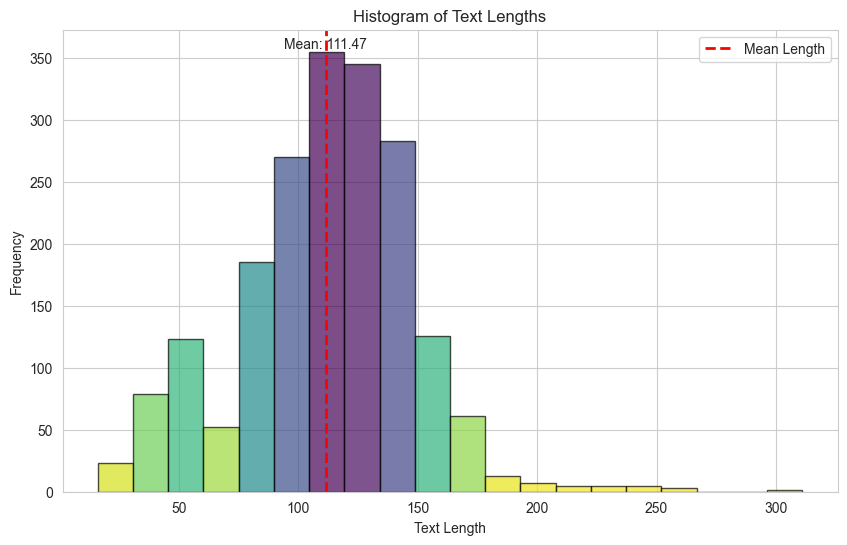

In [339]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the length of each text
text_lengths = df['Text'].apply(len)

# Set the figure size and create a subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram with customized settings
n, bins, patches = ax.hist(text_lengths, bins=20, edgecolor='black', alpha=0.7)

# Set colors for each patch based on frequency
max_freq = max(n)
colors = [plt.cm.viridis_r(freq / max_freq) for freq in n]
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Add a vertical line at the mean text length
mean_length = text_lengths.mean()
ax.axvline(mean_length, color='red', linestyle='--', linewidth=2, label='Mean Length')

# Set labels and title
ax.set_xlabel('Text Length')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Text Lengths')

# Add a legend
ax.legend()

# Add a label for the mean text length
ax.text(mean_length, max_freq, f'Mean: {mean_length:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()


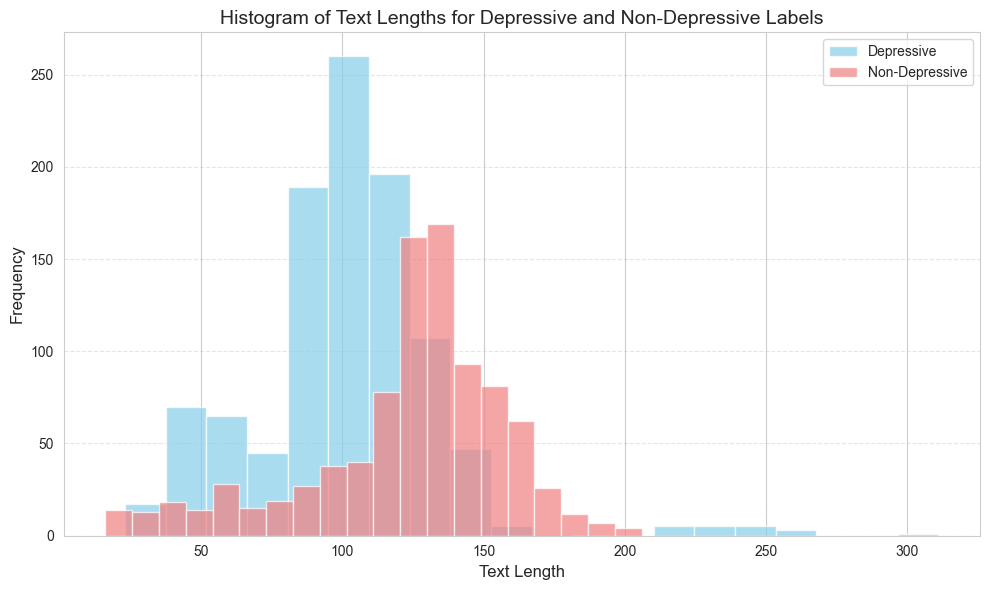

In [340]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for depressive and non-depressive labels
depressive_texts = df[df['Sentiment'] == 1]['Text']
non_depressive_texts = df[df['Sentiment'] == 0]['Text']

# Calculate the text lengths for each label
depressive_lengths = depressive_texts.apply(len)
non_depressive_lengths = non_depressive_texts.apply(len)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histograms
ax.hist(depressive_lengths, bins=20, alpha=0.7, label='Depressive', color='skyblue')
ax.hist(non_depressive_lengths, bins=20, alpha=0.7, label='Non-Depressive', color='lightcoral')

# Customize plot aesthetics
ax.set_xlabel('Text Length', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Histogram of Text Lengths for Depressive and Non-Depressive Labels', fontsize=14)
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()
